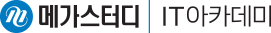

# 입문자를 위한, 머신러닝 기초   

### `활용실습` :  버거지수(Burger Index) 구해봅시다
 
> **배경지식** :
 
> - "버거 지수"는 진짜 도시의 발전 수준을 반영할까?" 라는 데이터분석 주제로 알려진, 버거지수라는 것을 구하기 위해,

> - "한 도시의 발전 수준은 (버거킹 + 맥도날드 + KFC의 각 매장개수) / 롯데리아의 매장개수를 계산하여 높게 나올수록 더 발전된 도시라고 할 수 있다" 를 웹 클롤링으로 다뤄보는 실습예제입니다.




> **버거지수 산출식** :

> <center>  ξ= ( B+M+K ) / L  </center> 을 계산해 보자.


]

## 필요한 Package 선언:

### selenium 설치

In [1]:
!pip install selenium 

  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached trio-0.19.0-py3-none-any.whl (356 kB)
  Using cached outcome-1.1.0-py2.py3-none-any.whl (9.7 kB)
  Using cached wsproto-1.0.0-py3-none-any.whl (24 kB)
  Using cached h11-0.12.0-py3-none-any.whl (54 kB)


#### Webdriver 설치를 위한 준비작업 :

1) `Chrome version 확인` :

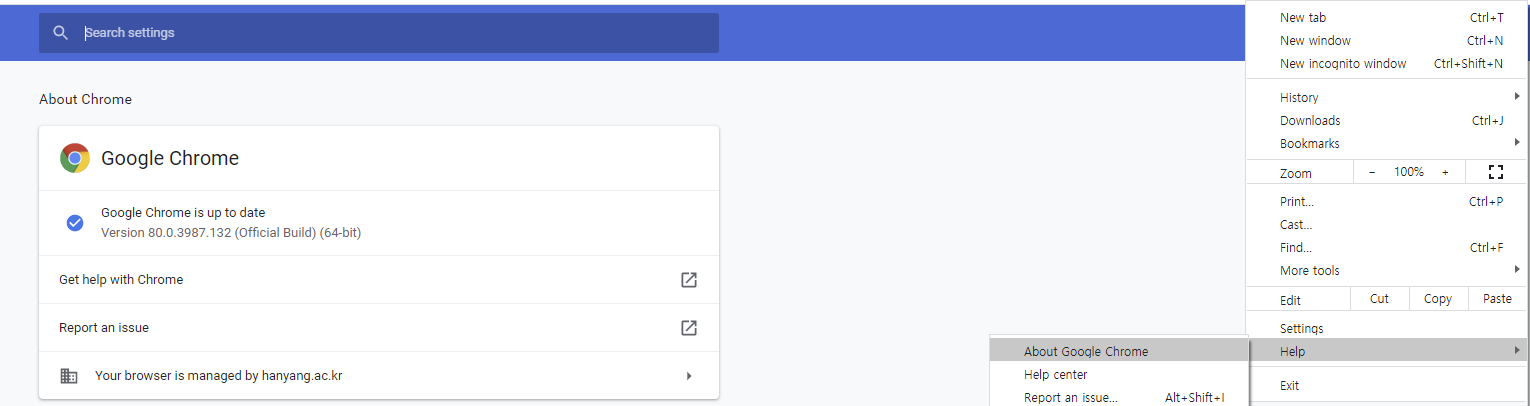



2) `Webdriver 사이트 접속 및 Download` :

https://chromedriver.chromium.org/downloads

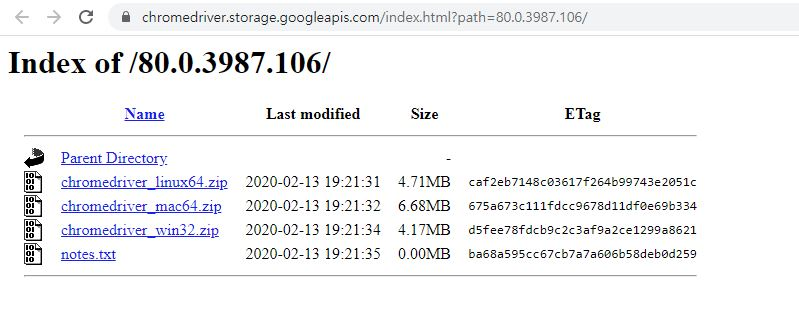


3) `다양한 browser 위한 Webdriver` :

https://selenium-python.readthedocs.io/api.html

##### 패키지 Import 방법 참조 :
- 1) `import pkg_name` : pkg_name 이름의 패키지를 로딩합니다 (일반적 방법)
- 2) `import pkg_name.sub` : pkg_name 와 하위 패키지 sub 까지 로딩합니다 (하위 패키지까지 로딩할 경우)
- 3) `from pkg_name.sub import abc` : pkg_name와 하위 패키지 sub 에다가 abc 모듈 또는 함수까지 로딩합니다

In [2]:
#from urllib.request import urlopen
#from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver
import time  # time delay를 위한 함수

import pandas as pd

## Burger King 사이트로부터 매장주소 검색 및 Crawling

- https://www.burgerking.co.kr/#/home

In [3]:
url = "https://www.burgerking.co.kr/#/home"

In [5]:
driver = webdriver.Chrome('chromedriver.exe')   # webdriver 쓰는 이유: chrome에서 작동되는걸 jupyter가 보려고
driver.get(url)

C:\Users\user\AppData\Local\Temp/ipykernel_8584/1307687985.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [6]:
driver  # 실행하는 순간 지금 보고 있는 화면 snapshot떠서 가져옴, html 정보도 있음

<selenium.webdriver.chrome.webdriver.WebDriver (session="20d3f7b52d51ba408a8d3017d209ff97")>

#### Web browser 화면에서 작업 :

- Python Selenium 패키지가 제공하는 Webdriver를 통해 New browser가 나타나면,
- 스크래핑하려는 화면으로 이동 후,
- 그 페이지의 Source를 발췌하게 된다. (아래 구문 참고)

In [7]:
html = driver.page_source

In [8]:
html

'<html><head><meta charset="utf-8"><meta name="viewport" content="initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no"><meta http-equiv="Cache-Control" content="no-cache"><meta http-equiv="Pragma" content="no-cache"><meta http-equiv="Expires" content="-1"><meta name="format-detection" content="telephone=no"><meta name="naver-site-verification" content="de1f2c29db8d396f61bc70f7287e85473dbac0e1"><meta name="description" content="버거킹 브랜드 스토리, 불맛 가득 와퍼, 와퍼주니어 등 메뉴소개, 매장소개, 할인 이벤트 소식 등"><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="application/ld+json">{\n "@context": "http://schema.org",\n "@type": "Organization",\n "name": "버거킹",\n "url": "https://burgerking.co.kr",\n "sameAs": [\n   "https://www.facebook.com/burgerkingkorea",\n   "https://www.instagram.com/burgerkingkorea/",\n   "https://www.youtube.com/channel/UCEKRI0fipK4LEgV98nI2CQA",\n   "https://play.google.com/store/apps/details?id=kr.co.burgerkinghyb

In [11]:
soup = BeautifulSoup(html, 'html.parser')
soup

<html><head><meta charset="utf-8"/><meta content="initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no" name="viewport"/><meta content="no-cache" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="-1" http-equiv="Expires"/><meta content="telephone=no" name="format-detection"/><meta content="de1f2c29db8d396f61bc70f7287e85473dbac0e1" name="naver-site-verification"/><meta content="버거킹 브랜드 스토리, 불맛 가득 와퍼, 와퍼주니어 등 메뉴소개, 매장소개, 할인 이벤트 소식 등" name="description"/><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script type="application/ld+json">{
 "@context": "http://schema.org",
 "@type": "Organization",
 "name": "버거킹",
 "url": "https://burgerking.co.kr",
 "sameAs": [
   "https://www.facebook.com/burgerkingkorea",
   "https://www.instagram.com/burgerkingkorea/",
   "https://www.youtube.com/channel/UCEKRI0fipK4LEgV98nI2CQA",
   "https://play.google.com/store/apps/details?id=kr.co.burgerkinghybri

In [ ]:
#<p class="addr"><span>서울특별시 도봉구 노해로 389</span><span> </span></p>

In [17]:
# .text : <> 밖에 있는거 가져오기
# .get : <> 안에 있는거 가져오기
addr_raw = soup.find_all("p",class_="addr")
len(addr_raw)

113

In [28]:
addr_raw

[<p class="addr"><span>서울특별시 도봉구 노해로 389</span><span> </span></p>,
 <p class="addr"><span>서울특별시 영등포구 선유로 130</span><span> </span></p>,
 <p class="addr"><span>서울특별시 도봉구 도당로 6</span><span> </span></p>,
 <p class="addr"><span>서울특별시 서대문구 연세로 25</span><span> </span></p>,
 <p class="addr"><span>서울특별시 종로구 종로 94</span><span> </span></p>,
 <p class="addr"><span>서울특별시 마포구 성암로 255</span><span> </span></p>,
 <p class="addr"><span>서울특별시 강동구 천호대로 1012</span><span> </span></p>,
 <p class="addr"><span>서울특별시 도봉구 도봉로 437</span><span> </span></p>,
 <p class="addr"><span>서울특별시 강동구 고덕로 168</span><span> </span></p>,
 <p class="addr"><span>서울특별시 강북구 도봉로 314 삼성화재 수유사옥 1층</span><span> </span></p>,
 <p class="addr"><span>서울특별시 강남구 선릉로 429</span><span> </span></p>,
 <p class="addr"><span>서울특별시 강남구 남부순환로 2936</span><span> </span></p>,
 <p class="addr"><span>서울특별시 구로구 디지털로 288</span><span> </span></p>,
 <p class="addr"><span>서울특별시 종로구 삼봉로 57</span><span> </span></p>,
 <p class="addr"><span>서울특별시 강동구 양재대로 1440</spa

#### 원하는 작업이 완료되었으면, 아래 구문으로 Web browser 를 닫도록 한다

In [14]:
driver.close()  # 주소 가져왔으면 닫아

### Burger King 매장주소 발췌

In [31]:
list_bgk_addr = []

for idx in range(0,20):
    addr = addr_raw[idx].text.split(" ")[1]
    lst_bgk_addr.append(addr)
    
list_bgk_addr

[]

In [28]:
# Type your code : 

list_bgk_addr =[]

for n in addr_raw:   
    #print(n.text)
    #print(n.text.split(' '))   
    print(n.text.split(' ')[1])
    
    list_bgk_addr.append(n.text.split(' ')[1])

동작구
도봉구
영등포구
도봉구
서대문구
강서구
은평구
종로구
마포구
강동구
도봉구
강남구
강동구
강북구
강남구
송파구
강남구
구로구
종로구
강동구
중구
송파구
영등포구
동작구
송파구
구로구
양천구
중구
강남구
강남구
중구
강남구
강남구
강남구
서초구
마포구
강서구
강남구
성북구
동대문구
중구
관악구
은평구
광진구
중구
서대문구
서초구
영등포구
서대문구
구로구
강서구
마포구
마포구
성북구
강북구
양천구
성북구
마포구
은평구
종로구
중랑구
노원구
송파구
중구
관악구
금천구
중구
구로구
성동구
광진구
동대문구
서초구
송파구
금천구
강동구
강남구
강남구
관악구
금천구
금천구
강서구
서초구
중구
송파구
강남구
양천구
양천구
영등포구
용산구
송파구
서대문구
서대문구
용산구
성북구
강남구
서초구
동작구
송파구
서초구
용산구
서초구
은평구
관악구
강서구
광진구
양천구
강동구
광진구
노원구
중구
양천구


In [32]:
df_bgk_addr = pd.DataFrame(list_bgk_addr, columns=['addr'])

In [33]:
df_bgk_addr['count'] = 1
df_bgk_addr

,addr,count


In [34]:
bgk_loc = pd.pivot_table(data=df_bgk_addr, index='addr', aggfunc='count')
bgk_loc

,count
addr,
강남구,13
강동구,5
강북구,2
강서구,5
관악구,4
광진구,4
구로구,4
금천구,4
노원구,2


#### CSV 파일 저장:

In [35]:
df_bgk_addr.to_csv('data/df_bgk_addr.csv', index=False)

#### CSV 파일 불러들이기:

In [36]:
df_bgk_addr = pd.read_csv('data/df_bgk_addr.csv')
df_bgk_addr

,addr,count
0,동작구,1
1,도봉구,1
2,영등포구,1
3,도봉구,1
4,서대문구,1
...,...,...
106,강동구,1
107,광진구,1
108,노원구,1
109,중구,1


]]

## McDonalds 사이트로부터 매장주소 검색 및 Crawling

- https://www.mcdonalds.co.kr/kor/store/list.do

In [37]:
url = "https://www.mcdonalds.co.kr/kor/store/list.do"

In [34]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get(url)

C:\Users\user\AppData\Local\Temp/ipykernel_8584/1307687985.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [43]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="6cc63fd302384b475195e99489c8db0f")>

In [44]:
html = driver.page_source

In [45]:
soup = BeautifulSoup(html, 'html.parser')

In [46]:
soup

<html lang="ko"><head>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://connect.facebook.net/signals/config/2808577885918545?v=2.9.48&amp;r=stable"></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script>
	if(self.location.protocol == "http:" && self.location.hostname.indexOf('mcdonalds.co.kr') != -1) {
    	self.location.href = self.location.href.replace('http',"https");
	}
</script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>지역별 매장찾기 - 맥도날드 홈페이지</title>
<meta contents="메뉴, 레스토랑, 프로모션 등 안내 매장찾기" id="description" name="description"/>
<meta contents="McDonald's, McDrive, McDelivery, McMorning, Happy Meal, Signature Burger, McAllday, McCafe" name="keywords"/>
<link href="/kor/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/kor/css/common.css?t=20220105" rel="stylesheet"/>
<link href="https://www.mcd

In [ ]:
<dd class="road">부산 부산진구 복지로 70, 상가 103호 (개금동, 현대아이아파트)</dd>

In [42]:
soup.find_all("dd",class_="road")  # 내가 띠운 페이지만 나옴

[<dd class="road">부산 부산진구 복지로 70, 상가 103호 (개금동, 현대아이아파트)</dd>,
 <dd class="road">서울 강남구 테헤란로 107 메디타워2층</dd>,
 <dd class="road">대구 북구 칠곡중앙대로 303</dd>,
 <dd class="road">경북 김천시 자산로 199</dd>,
 <dd class="road">대전 유성구 대덕대로 535</dd>]

In [47]:
soup.find_all("dd",class_="road")

[<dd class="road">서울 강북구 도봉로 204 미아역 맥도날드</dd>,
 <dd class="road">경기 의정부시 민락로 11</dd>,
 <dd class="road">대구 중구 국채보상로 586 (동성로2가)</dd>,
 <dd class="road">전남 순천시 구암원길 1 (덕암동)</dd>,
 <dd class="road">경기 화성시 경기대로 1004 (병점동)</dd>]

1) All scan
------------
2) driver
3) find
4) find detail - 한페이지부터 해결하고 페이지 바뀌는거 덧붙여
5) page move
-------------

In [48]:
addr_raw = soup.find_all('dd', class_='road')
len(soup.find_all('dd', 'road'))

5

#### 1 page 셈플링으로 주소 취합 테스트 :

In [51]:
addr_raw[0].text

'서울 강북구 도봉로 204 미아역 맥도날드'

In [59]:
for n in addr_raw:
    if n.text.split(" ")[0] == "서울":
        print(n.text.split(" ")[1])

강북구


In [60]:
list_mcd_addr = []

for n in addr_raw:
#     print(n.text)                  # addr_raw 로 부터 순차적으로 발췌되는 값 확인용
#     print(n.text[0:3])             # addr_raw 값에서 앞부분('서울') 인 것 확인용 (이유: 경기도... 서울외곽 같은 엉뚱한 주소 걸러내기)
#     print(n.text.split(' '))       # addr_raw 주소 ' ' 단위로 구분 작업
#     print(n.text.split(' ')[0:2])  # addr_raw 주소 ' ' 단위로 구분 후, 구 정보 포지션 확인용
    if '서울' in n.text[0:3]:
        print(n.text.split(' ')[1])

강북구


#### 여러 page 연결하기 위한 테스트 :

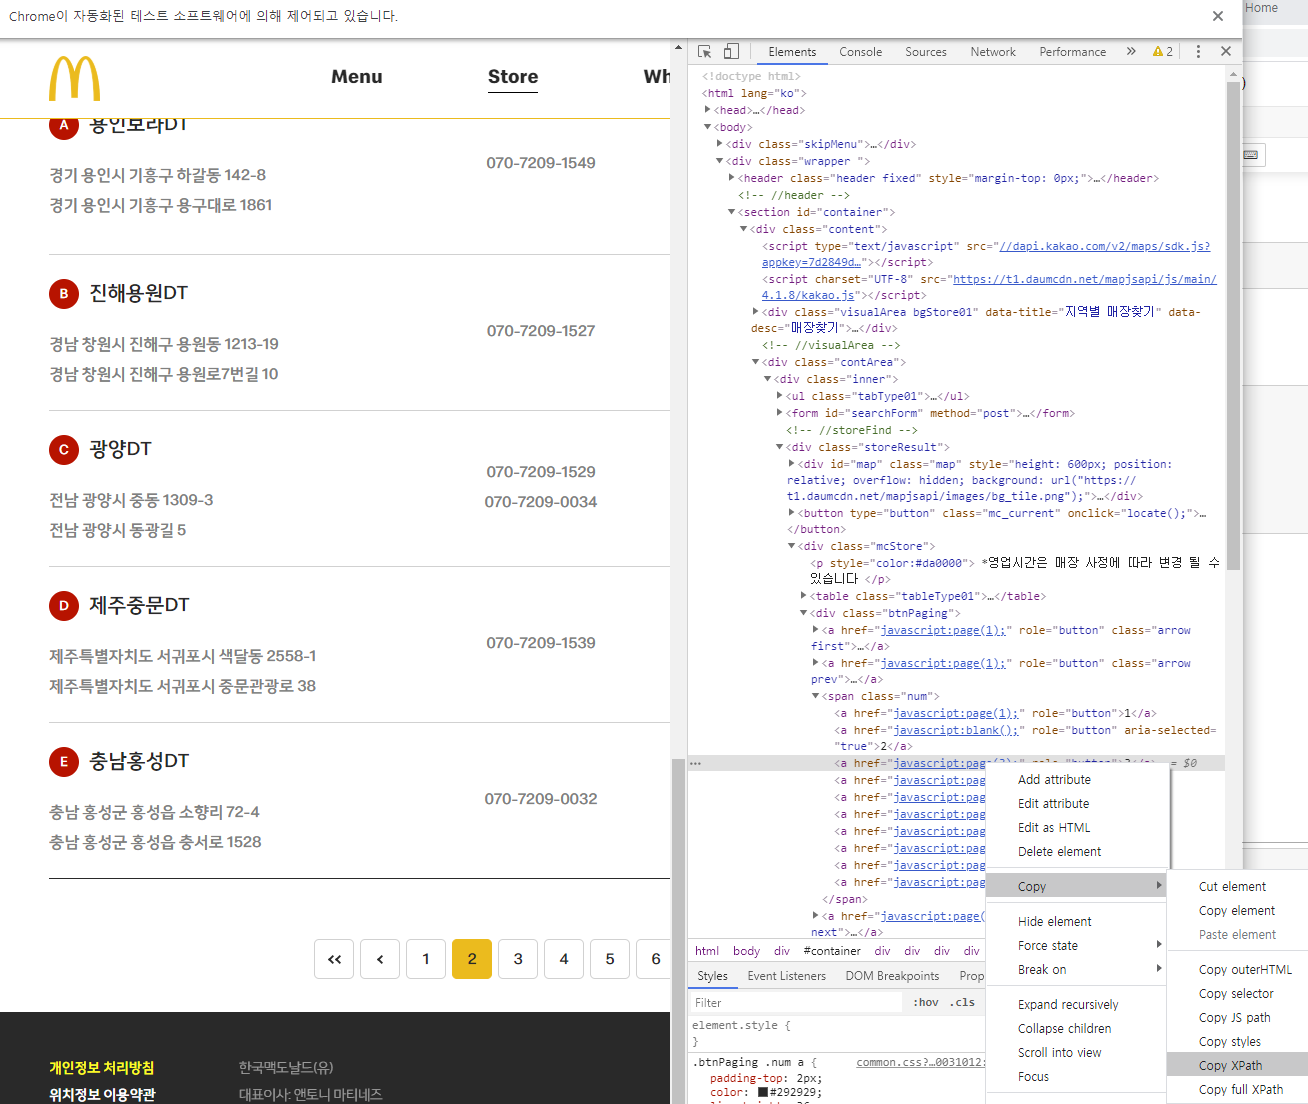


__

#### McDonalds 경우, 여러 페이지에 걸쳐 정보를 획득해야 하는 사이트이므로

- 매 화면으로 이동하기 위한 click 기능을 활용하도록 한다
- Python Selenium 에서는 '클릭할 위치(xpath)' 를 찾아서
- 관련된 구문을 통해 수행하면 쉽게 처리 가능하다 

In [ ]:
## 클릭할 위치를 Sample 로 취한 값 : xpath 정보 사례
xpath2 = //*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[2]
xpath9 = //*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[9]

In [30]:
xpath = """//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[10]"""
driver.find_element_by_xpath(xpath).click()

## 페이지 구성 (예)
#//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[10]   # 해당 page 내에서 1~10까지 번호
#//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/a[3]         # Next page
#//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[1]
#//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/a[3]

### McDonalds 매장주소 발췌

In [ ]:
# //*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[5]   # 5
# //*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[9]   # 9
# //*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[6]   # 16
# //*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/a[3]        # next page

In [61]:
# Type your code :

list_mcd_addr = []

max_page = 81     #현재 기준 McDonalds 매장 주소화면 마지막 page 기준

for p in range(1,max_page+1):
    if p % 10 == 0:
        i = 10
    else:
        i = p % 10
    xpath = f"""//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/span/a[{i}]"""
    driver.find_element_by_xpath(xpath).click()   # xpath 누르는거
    time.sleep(3)  # time.sleep(숫자)에서 숫자를 작게하면 더 빨라짐: 1정도로 해도 됨, 너무 빠르면 뭐 에러난다고 했던거같음
    
    # 주소정보 Collect : 
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    addr_raw = soup.find_all('dd', 'road')
    
    for n in addr_raw:
        if '서울' in n.text[0:3]:
            list_mcd_addr.append(n.text.split(' ')[1])

    # Next page 검사 : 
    if p % 10 == 0:
        xpath = """//*[@id="container"]/div[1]/div[2]/div/div/div[2]/div/a[3]"""   # Next page
        driver.find_element_by_xpath(xpath).click()
        time.sleep(3)


C:\Users\user\AppData\Local\Temp/ipykernel_8584/1899417936.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath).click()   # xpath 누르는거
C:\Users\user\AppData\Local\Temp/ipykernel_8584/1899417936.py:28: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath).click()


In [62]:
print(len(list_mcd_addr))
list_mcd_addr

96


['강남구',
 '강북구',
 '금천구',
 '강서구',
 '송파구',
 '종로구',
 '송파구',
 '송파구',
 '서초구',
 '영등포구',
 '양천구',
 '서대문구',
 '강남구',
 '마포구',
 '영등포구',
 '강남구',
 '광진구',
 '중구',
 '금천구',
 '서초구',
 '금천구',
 '동작구',
 '구로구',
 '마포구',
 '동작구',
 '강남구',
 '강남구',
 '서초구',
 '중구',
 '구로구',
 '종로구',
 '은평구',
 '강남구',
 '서초구',
 '도봉구',
 '성동구',
 '서초구',
 '구로구',
 '용산구',
 '성북구',
 '은평구',
 '송파구',
 '송파구',
 '강서구',
 '동대문구',
 '양천구',
 '은평구',
 '중랑구',
 '강남구',
 '양천구',
 '성동구',
 '중랑구',
 '종로구',
 '노원구',
 '광진구',
 '양천구',
 '중랑구',
 '노원구',
 '성북구',
 '영등포구',
 '관악구',
 '성북구',
 '강북구',
 '서초구',
 '동작구',
 '용산구',
 '양천구',
 '동대문구',
 '동대문구',
 '강남구',
 '강남구',
 '강서구',
 '서대문구',
 '동작구',
 '노원구',
 '강동구',
 '도봉구',
 '송파구',
 '노원구',
 '금천구',
 '강북구',
 '강북구',
 '강서구',
 '강동구',
 '강동구',
 '구로구',
 '영등포구',
 '강남구',
 '마포구',
 '서대문구',
 '강남구',
 '종로구',
 '마포구',
 '송파구',
 '노원구',
 '중구']

In [63]:
driver.close()

### McDonalds 매장주소 발췌 결과

In [64]:
list_mcd_addr[:10]

['강남구', '강북구', '금천구', '강서구', '송파구', '종로구', '송파구', '송파구', '서초구', '영등포구']

In [65]:
df_mcd_addr = pd.DataFrame(list_mcd_addr, columns=['addr'])
df_mcd_addr['count'] = 1
df_mcd_addr.head()

,addr,count
0,강남구,1
1,강북구,1
2,금천구,1
3,강서구,1
4,송파구,1


#### csv 파일 저장용 :

In [67]:
df_mcd_addr.to_csv('df_mcd_addr.csv', index=False)

#### csv 파일 읽기 :

In [69]:
df_mcd_addr = pd.read_csv('df_mcd_addr.csv')
df_mcd_addr

,addr,count
0,강남구,1
1,강북구,1
2,금천구,1
3,강서구,1
4,송파구,1
...,...,...
91,종로구,1
92,마포구,1
93,송파구,1
94,노원구,1


In [70]:
mcd_loc = pd.pivot_table(data=df_mcd_addr, index='addr', aggfunc='count')
mcd_loc.head()

,count
addr,
강남구,11
강동구,3
강북구,4
강서구,4
관악구,1


]]

## KFC 사이트로부터 매장주소 검색 및 Crawling

- https://www.kfckorea.com/

In [39]:
url = "https://www.kfckorea.com/"

In [59]:
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.get(url)

In [25]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="b20286ed80c92e896ab9727abeb8fb34")>

In [41]:
html = driver.page_source

In [42]:
soup = BeautifulSoup(html, 'html.parser')

In [28]:
soup

<html><head> <meta charset="utf-8"/> <meta content="user-scalable=no,initial-scale=1,maximum-scale=1,minimum-scale=1,width=device-width" name="viewport"/> <meta content="telephone=no" name="format-detection"/> <link href="/assets/favicon.ico?9dd11558a46449e91e84d3c29caa15ea" rel="icon" type="image/png"/> <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="/static/js/jquery.min.js"></script> <script src="/static/js/plupload.full.min.js"></script> <script src="/static/js/shareTooltip.js"></script> <script src="//dapi.kakao.com/v2/maps/sdk.js?appkey=3152aa8815b84f8057b940b20f5b9600"></script><script charset="UTF-8" src="https://t1.daumcdn.net/mapjsapi/js/main/4.1.8/kakao.js"></script> <script src="//developers.kakao.com/sdk/js/kakao.min.js"></script> <style type="text/css">[data-server-rendered]{display:none}</style> <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-129886115-1"></script> <script>function gta

#### Page 구조 파악

 - 버거킹, 맥도널드 사이트와 다르게, 시도 + 구/군 정보를 입력해야 주소정보를 알 수 있음 

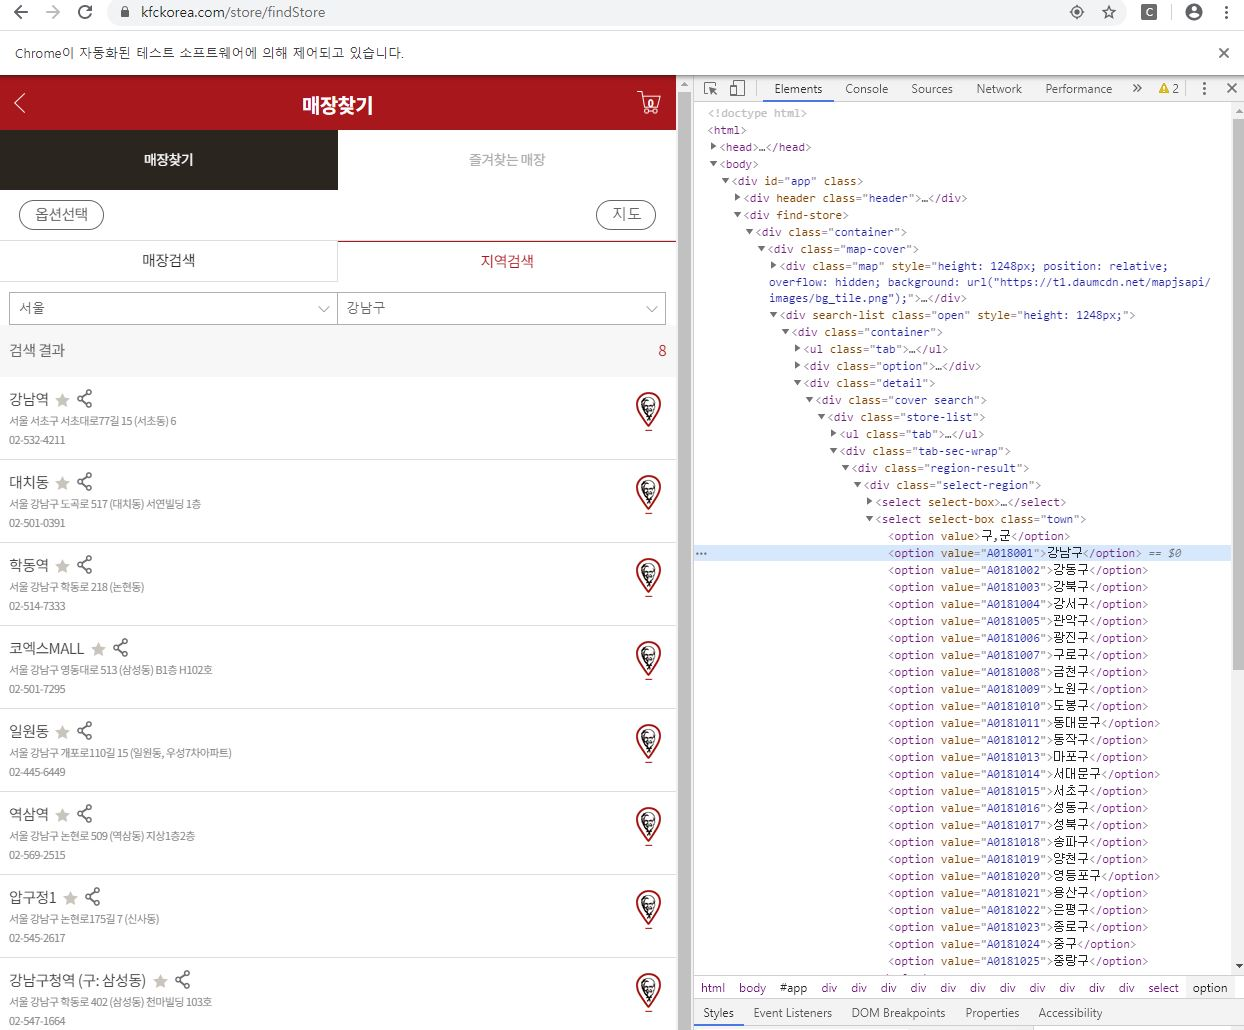

##### 1) 서울시 기준, 구 이름 선택 구조 파악 :

In [ ]:
//*[@id="app"]/div[2]/div/div/div[2]/div/div[2]/div/div/div/div/div[1]/select[2]

In [43]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [44]:
soup.find_all('select', 'town')

[<select class="town" select-box=""> <option value="">구,군</option><option value="A018001">강남구</option><option value="A0181002">강동구</option><option value="A0181003">강북구</option><option value="A0181004">강서구</option><option value="A0181005">관악구</option><option value="A0181006">광진구</option><option value="A0181007">구로구</option><option value="A0181008">금천구</option><option value="A0181009">노원구</option><option value="A0181010">도봉구</option><option value="A0181011">동대문구</option><option value="A0181012">동작구</option><option value="A0181013">마포구</option><option value="A0181014">서대문구</option><option value="A0181015">서초구</option><option value="A0181016">성동구</option><option value="A0181017">성북구</option><option value="A0181018">송파구</option><option value="A0181019">양천구</option><option value="A0181020">영등포구</option><option value="A0181021">용산구</option><option value="A0181022">은평구</option><option value="A0181023">종로구</option><option value="A0181024">중구</option><option value="A0181025">중랑구</option></select

In [56]:
soup.find_all('ul', {'class':'store-item'})[0].text.split(' ').index('서울')

9

In [ ]:
soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ').index('서울') # '서울시 대상 중, 구 정보 찾기위한 사전파악


In [57]:
idx_num = soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ').index('서울')
soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ')[idx_num+1]    # 구 정보 위치는 '서울' + 1 위치이므로


'강북구'

In [58]:
# 구 정보 Collect :
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [133]:
soup.find_all('select', 'town')

[<select class="town" select-box=""> <option value="">구,군</option><option value="A018001">강남구</option><option value="A0181002">강동구</option><option value="A0181003">강북구</option><option value="A0181004">강서구</option><option value="A0181005">관악구</option><option value="A0181006">광진구</option><option value="A0181007">구로구</option><option value="A0181008">금천구</option><option value="A0181009">노원구</option><option value="A0181010">도봉구</option><option value="A0181011">동대문구</option><option value="A0181012">동작구</option><option value="A0181013">마포구</option><option value="A0181014">서대문구</option><option value="A0181015">서초구</option><option value="A0181016">성동구</option><option value="A0181017">성북구</option><option value="A0181018">송파구</option><option value="A0181019">양천구</option><option value="A0181020">영등포구</option><option value="A0181021">용산구</option><option value="A0181022">은평구</option><option value="A0181023">종로구</option><option value="A0181024">중구</option><option value="A0181025">중랑구</option></select

##### 2) (서울시 기준, 구 별)조회결과로부터 매장주소 구조 파악 :

In [134]:
## 페이지 구성 (예)
xpath = """//*[@id="app"]/div[2]/div/div/div[2]/div/div[2]/div/div/div/div/div[1]/select[2]/option[2]"""  # 강남구 (First)
#xpath = """//*[@id="app"]/div[2]/div/div/div[2]/div/div[2]/div/div/div/div/div[1]/select[2]/option[26]""" # 중랑구 (Last)
driver.find_element_by_xpath(xpath).click()

In [59]:
# 주소정보 Collect : 
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [117]:
soup.find_all('ul', {'class':'store-item'})           # 검색결과 전체
len(soup.find_all('ul', {'class':'store-item'}))      # 검색결과로부터 전체 대상갯수 파악(확인용)

8

In [123]:
soup.find_all('ul', {'class':'store-item'})[0]                                     # 1번째 검색결과
soup.find_all('ul', class_='store-item')[0]                                        # 위와 동일한 표현(다른 형태)
soup.find_all('ul', {'class':'store-item'})[0].get_text()                          # Text 만 추출
soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ')               # 단어군 분리, ' ' 단위로 구분 (List 형)

##
soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ').index('서울') # '서울시 대상 중, 구 정보 찾기위한 사전파악
idx_num = soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ').index('서울')
soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ')[idx_num+1]    # 구 정보 위치는 '서울' + 1 위치이므로

'서초구'

### KFC 매장주소 발췌

In [60]:
# Type your code : 

list_kfc_addr = []

max_num = 26      #현재 기준 KFC 매장 주소화면에서 마지막 선택가능한 구/군 기준

for p in range(2,max_num+1):     # (The First)강남구 : 2,   (The Last)중랑구 : 26
    xpath = f"""//*[@id="app"]/div[2]/div/div/div[2]/div/div[2]/div/div/div/div/div[1]/select[2]/option[{p}]"""
    driver.find_element_by_xpath(xpath).click()
    time.sleep(3)
    
    # 정보 수집Collect : 
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    addr_raw = soup.find_all('ul', {'class':'store-item'}) 
    #addr_raw = soup.find_all('ul', class_='store-item')

    # 수집된 발췌결과 중, Text 정보 분리 및 구 정보 걸러내기:
    if len(addr_raw) > 0:      # 발췌 결과정보 유효성 점검(Validation check)
                               # List 갯수 파악: (목적: 검색결과가 있는지 사전 파악하기 위함; 결과 값이 없으면 구 정보도 없음)
        for i in range(0,len(addr_raw)):
            addr_raw[i].get_text().split(' ').index('서울') 
            idx_num = addr_raw[i].get_text().split(' ').index('서울')
            list_kfc_addr.append(addr_raw[i].get_text().split(' ')[idx_num+1])
            #soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ').index('서울') 
            #idx_num = soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ').index('서울')
            #list_kfc_addr.append(soup.find_all('ul', {'class':'store-item'})[0].get_text().split(' ')[idx_num+1])            
            
    else:                      # List 정보 유효성 점검(Validation check); list 에 값이 없을 경우, continue (예: 양천구, 중구)
        continue


In [62]:
print(len(list_kfc_addr))
list_kfc_addr

In [ ]:
driver.close()

### KFC 매장주소 발췌 결과

In [63]:
list_kfc_addr[:10]

['서초구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강동구', '강동구']

In [64]:
df_kfc_addr = pd.DataFrame(list_kfc_addr, columns=['addr'])
df_kfc_addr['count'] = 1
df_kfc_addr.head()

,addr,count
0,서초구,1
1,강남구,1
2,강남구,1
3,강남구,1
4,강남구,1


#### csv 파일 저장용 :

In [65]:
df_kfc_addr.to_csv('data/df_kfc_addr.csv', index=False)

#### csv 파일 읽기 :

In [6]:
df_kfc_addr = pd.read_csv('data/df_kfc_addr.csv')
df_kfc_addr

,addr,count
0,서초구,1
1,강남구,1
2,강남구,1
3,강남구,1
4,강남구,1
...,...,...
63,종로구,1
64,종로구,1
65,종로구,1
66,중랑구,1


In [ ]:
kfc_loc = pd.pivot_table(data=df_kfc_addr, index='addr', aggfunc='count')
kfc_loc.head()

]]

## Lotteria 사이트로부터 매장주소 검색 및 Crawling

- https://www.lotteria.com/

In [67]:
url = "http://www.lotteria.com/Shop/Shop_List.asp#devCallShopList"

In [119]:
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.get(url)

In [120]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="1e8c50bcb46201de185feedb52136055")>

In [88]:
html = driver.page_source

In [89]:
soup = BeautifulSoup(html, 'html.parser')

In [266]:
soup

<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>매장찾기 | 롯데리아</title>
<!-- $$$ -->
<!-- <meta http-equiv="X-UA-Compatible" content="IE=9" /> -->
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<link href="/Images/common/favicon.png" id="shortcut" rel="shortcut icon"/>
<link href="/library/css/reset.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/select.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/style.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/jquery.ui.theme.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/jquery.ui.datepicker.css" rel="stylesheet" type="text/css"/><script async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/all.js?hash=055db03ff5000e19361f8aba76b43d29&amp;ua=modern_es6">

#### Page 구조 파악

 - 맥도널드 + KFC 사이트에서 적용했던 방법을 혼합해서 사용
 - 구 별로 조회된 결과의 갯수를 반영

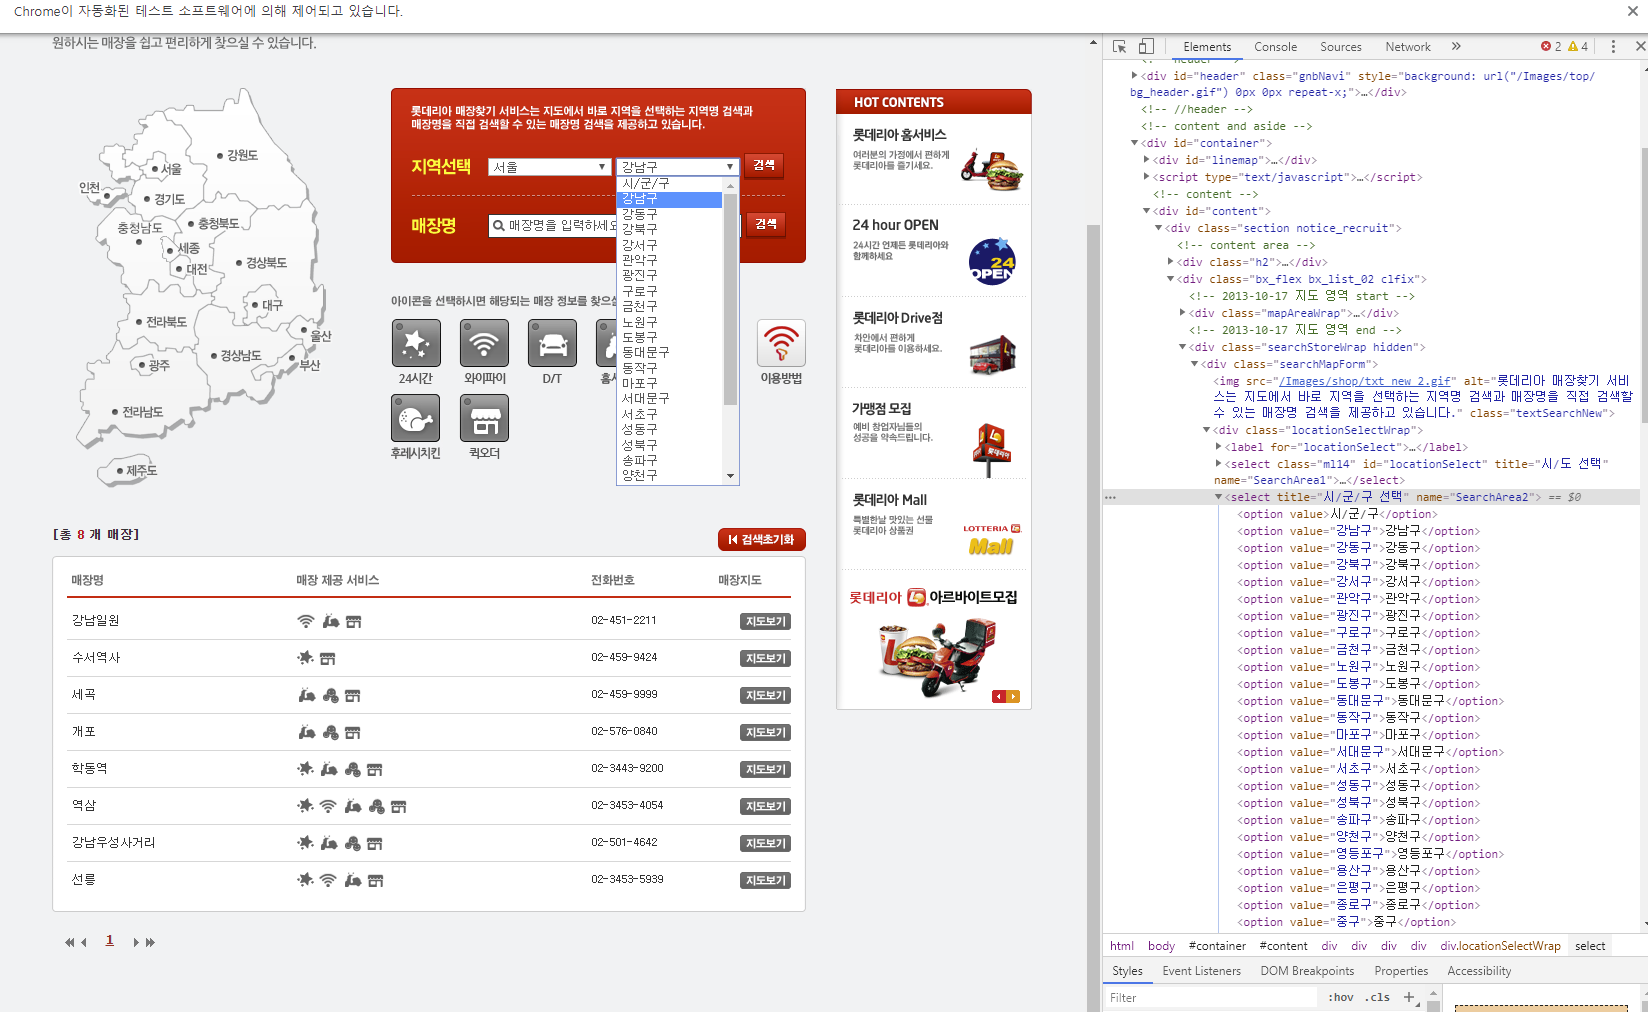
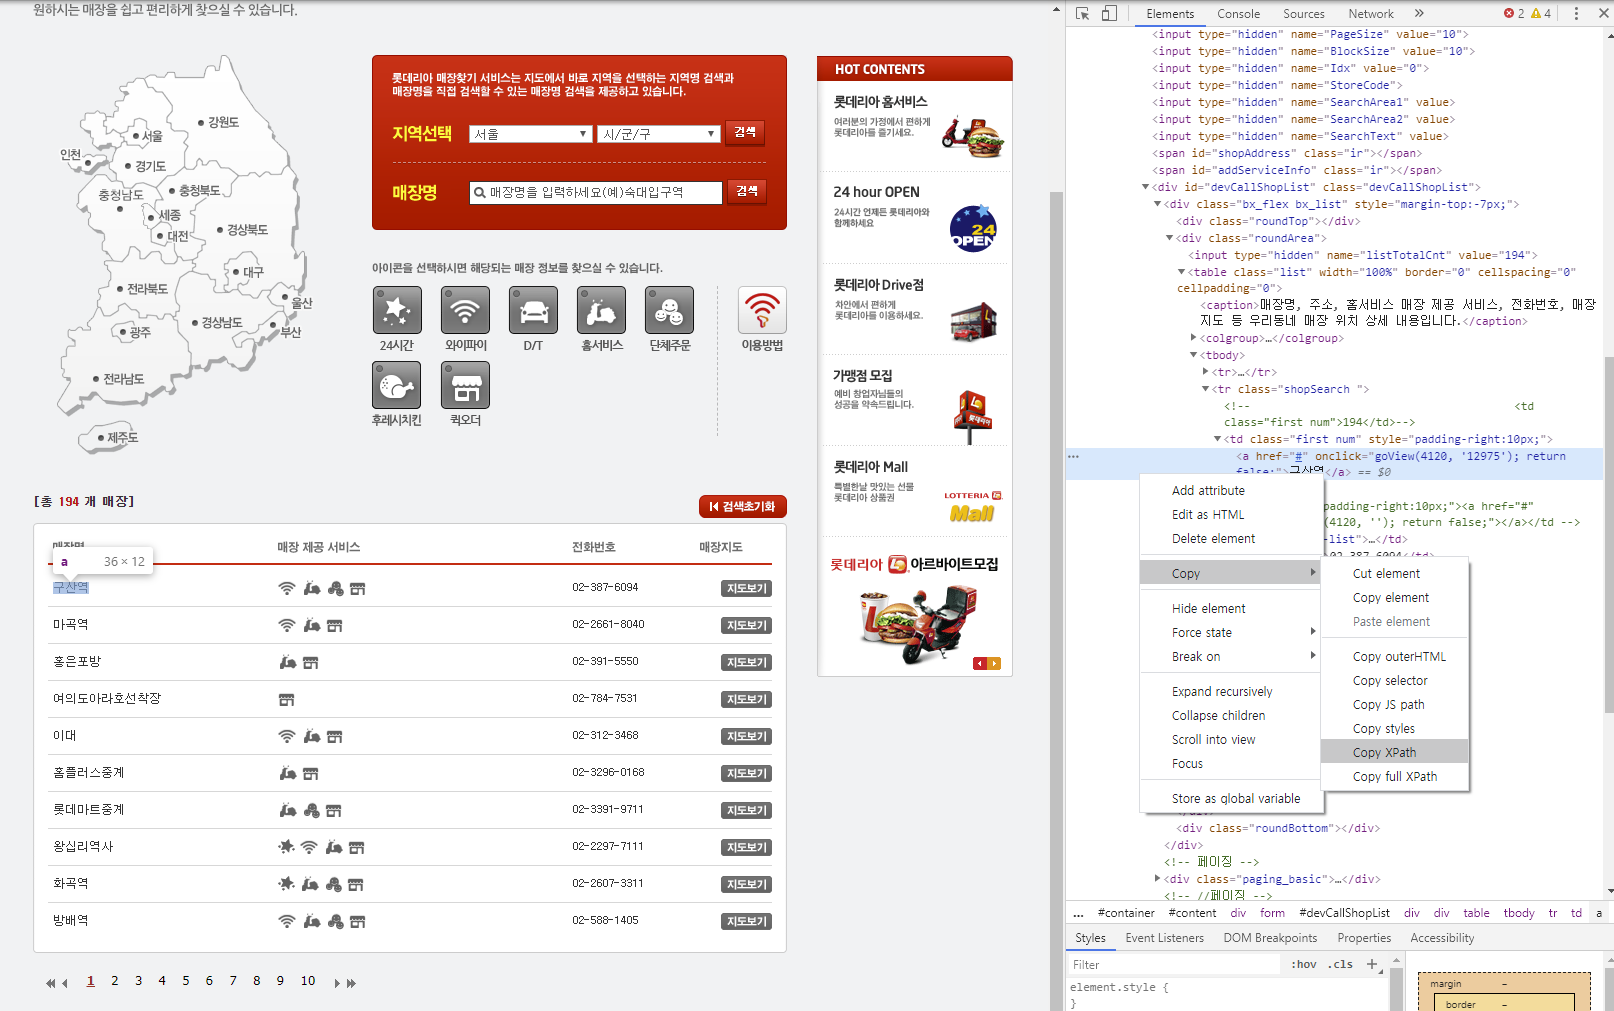

##### 1) 서울시 기준, 검색결과 파악 :
 - 구 정보 발췌

In [72]:
lot_gu_raw = soup.find_all('select', {'title':'시/군/구 선택'})
lot_gu_raw

[<select name="SearchArea2" title="시/군/구 선택"><option value="">시/군/구</option><option value="강남구">강남구</option><option value="강동구">강동구</option><option value="강북구">강북구</option><option value="강서구">강서구</option><option value="관악구">관악구</option><option value="광진구">광진구</option><option value="구로구">구로구</option><option value="금천구">금천구</option><option value="노원구">노원구</option><option value="도봉구">도봉구</option><option value="동대문구">동대문구</option><option value="동작구">동작구</option><option value="마포구">마포구</option><option value="서대문구">서대문구</option><option value="서초구">서초구</option><option value="성동구">성동구</option><option value="성북구">성북구</option><option value="송파구">송파구</option><option value="양천구">양천구</option><option value="영등포구">영등포구</option><option value="용산구">용산구</option><option value="은평구">은평구</option><option value="종로구">종로구</option><option value="중구">중구</option><option value="중랑구">중랑구</option></select>]

In [84]:
str(lot_gu_raw).split('option value="')
str(lot_gu_raw).split('option value="')[3].split('">')[0]    # 구 정보만 발췌  (2~26)

'강동구'

In [121]:
list_gu = []

for i in range(2,27):
    print(str(lot_gu_raw).split('option value="')[i].split('">')[0])    # 구 정보만 발췌  (2~26)
    list_gu.append(str(lot_gu_raw).split('option value="')[i].split('">')[0])

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [86]:
print(list_gu[0:])
len(list_gu)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


25

In [91]:
soup.find_all('span', class_='red_txt')[0].text

'13'

##### 또다른 방법 참조 :

In [ ]:
element = driver.find_element_by_xpath("""//*[@id="content"]/div/div[2]/div[2]/div[1]/div[1]/select[2]""")
all_options = element.find_elements_by_tag_name("option")
for option in all_options:
    print(option.get_attribute("value"))
    option.click()

##### 2) (서울시 기준, 구 별)조회결과로부터 매장 갯수 정보 파악 :

In [122]:
## Key 조작을 위한 함수 Import

from selenium.webdriver.common.keys import Keys

In [123]:
## 구 별 정보 입력 XPath 확인 :
xpath = """//*[@id="content"]/div/div[2]/div[2]/div[1]/div[1]/select[2]"""

## 구 별 정보 입력 위치에 구 정보 입력 테스트 :
element = driver.find_element_by_xpath("""//*[@id="content"]/div/div[2]/div[2]/div[1]/div[1]/select[2]""")
element.send_keys(Keys.ARROW_DOWN)   # 직접 입력할 수 있는 경우 send_keys(list_gu[0]) 과 같이 처리하면 됨

In [101]:
## 입력 후, '검색' 버튼 클릭 테스트 :
xpath = """//*[@id="content"]/div/div[2]/div[2]/div[1]/div[1]/a/img"""
driver.find_element_by_xpath("""//*[@id="content"]/div/div[2]/div[2]/div[1]/div[1]/a/img""").click()

In [102]:
## 주소정보 Collect : 
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [103]:
soup.find_all('input', {'value':'서울'})
soup

<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>매장찾기 | 롯데리아</title>
<!-- ### -->
<!-- <meta http-equiv="X-UA-Compatible" content="IE=9" /> -->
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<link href="/Images/common/favicon.png" id="shortcut" rel="shortcut icon"/>
<link href="/library/css/reset.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/select.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/style.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/jquery.ui.theme.css" rel="stylesheet" type="text/css"/>
<link href="/library/css/jquery.ui.datepicker.css" rel="stylesheet" type="text/css"/><script async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" crossorigin="anonymous" src="https://connect.facebook.net/en_US/all.js?hash=ba39f677811297bc172c440a0eb39a0d&amp;ua=modern_es6">

In [111]:
soup.find_all('span', {'class':'red_txt'})                  # 매장 갯수 정보 위치 찾기
soup.find_all('span', {'class':'red_txt'})[0].text          # 매장 갯수 정보 발췌
int(soup.find_all('span', {'class':'red_txt'})[0].text)     # str -> int 숫자형으로 변환

4

### Lotteria 매장주소 발췌

In [3]:
# Type your code : 




]]

## 버거지수 산출 :
-  bgk_loc, mcd_loc, kfc_loc, lot_loc

-  ξ= ( B+M+K ) / L  을 계산해 보자.

In [143]:
pd.merge(bgk_loc, mcd_loc, how='outer', on='addr')
pd.merge(pd.merge(bgk_loc, mcd_loc, how='outer', on='addr'), kfc_loc, how='outer', on='addr')
pd.merge(pd.merge(pd.merge(bgk_loc, mcd_loc, how='outer', on='addr'), kfc_loc, how='outer', on='addr'), lot_loc, how='outer', on='addr')

,count_x,count_y,count_x,count_y
addr,,,,
강남구,14,11,7.0,8
강동구,5,4,2.0,8
강북구,2,4,1.0,4
강서구,5,4,4.0,13
관악구,4,1,3.0,10
광진구,4,2,2.0,11
구로구,4,4,1.0,6
금천구,4,4,2.0,4
노원구,2,5,3.0,10


In [10]:
df_BMKL = pd.DataFrame(pd.merge(pd.merge(pd.merge(bgk_loc, mcd_loc, how='outer', on='addr'), kfc_loc, how='outer', on='addr'), lot_loc, how='outer', on='addr')).fillna(0)
#df_BMKL = pd.merge(pd.merge(pd.merge(bgk_loc, mcd_loc, how='outer', on='addr'), kfc_loc, how='outer', on='addr'), lot_loc, how='outer', on='addr').fillna(0)

In [11]:
df_BMKL.columns=['BGK','MCD','KFC','LOT']

In [12]:
df_BMKL

,BGK,MCD,KFC,LOT
addr,,,,
강남구,14,11,7.0,8
강동구,5,4,2.0,8
강북구,2,4,1.0,4
강서구,5,4,4.0,13
관악구,4,1,3.0,10
광진구,4,2,2.0,11
구로구,4,4,1.0,6
금천구,4,4,2.0,4
노원구,2,5,3.0,10


### 분석: 시각화

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### Font 깨지는 문제 해결용 : 

In [14]:
matplotlib.rc('font', family='Malgun Gothic') # for Windows

#### Font 글자 더 선명하게 표시하는 설정 :

In [15]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

]]

In [34]:
df_BMKL.columns

Index(['BGK', 'MCD', 'KFC', 'LOT'], dtype='object')

In [66]:
#plt.subplot(221)
#sns.barplot(data=df_BMKL, y=df_BMKL.index, x='BGK') 

#plt.subplot(222)
#sns.barplot(data=df_BMKL, y=df_BMKL.index, x='MCD') 

#plt.subplot(223)
#sns.barplot(data=df_BMKL, y=df_BMKL.index, x='KFC') 

#plt.subplot(224)
#sns.barplot(data=df_BMKL, y=df_BMKL.index, x='LOT') 

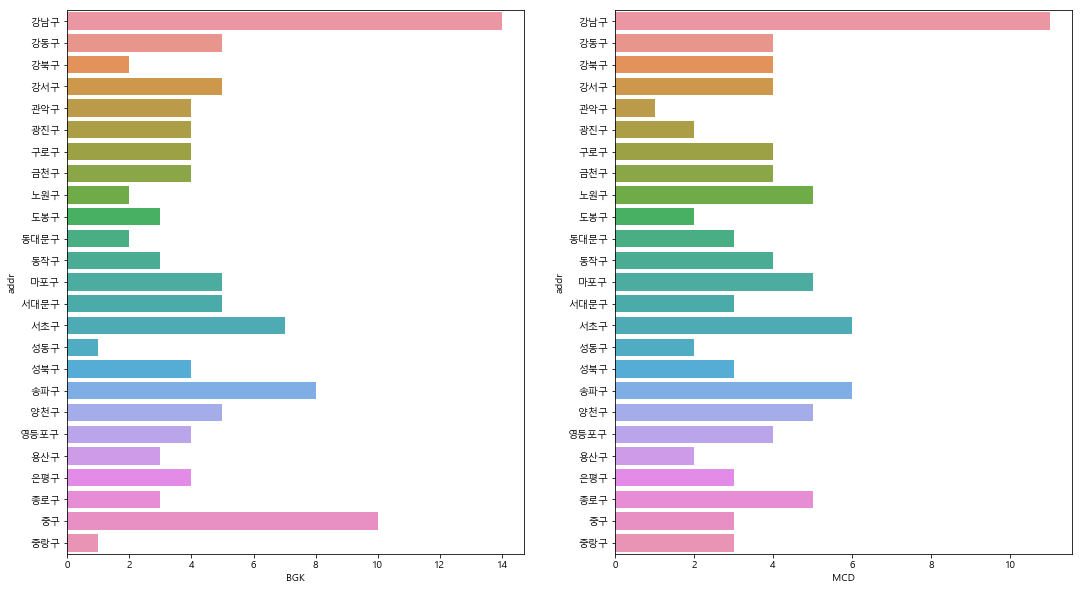

In [54]:
#plt.subplots()
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)     
figure.set_size_inches(18, 10)

sns.barplot(data=df_BMKL, y=df_BMKL.index, x='BGK', ax=ax1, label='BurgerKing')
sns.barplot(data=df_BMKL, y=df_BMKL.index, x='MCD', ax=ax2, label='McDonalds')

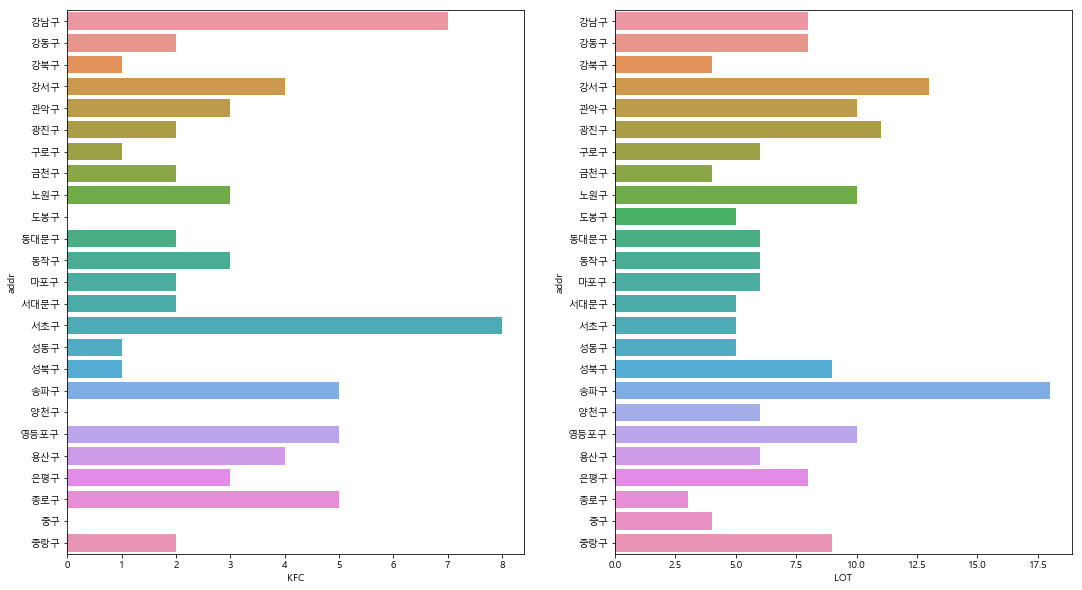

In [57]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)     
figure.set_size_inches(18, 10)

sns.barplot(data=df_BMKL, y=df_BMKL.index, x='KFC', ax=ax1, label='KFC')
sns.barplot(data=df_BMKL, y=df_BMKL.index, x='LOT', ax=ax2, label='Lotteria')

]]

### 버거지수 산출 :

In [70]:
df_BMKL['Sum_BMK'] = df_BMKL['BGK'] + df_BMKL['MCD'] + df_BMKL['KFC']
df_BMKL.sort_values(by='Sum_BMK', ascending=False)

,BGK,MCD,KFC,LOT,Sum_BMK,Index
addr,,,,,,
강남구,14,11,7.0,8,32.0,4.000000
서초구,7,6,8.0,5,21.0,4.200000
송파구,8,6,5.0,18,19.0,1.055556
중구,10,3,0.0,4,13.0,3.250000
강서구,5,4,4.0,13,13.0,1.000000
종로구,3,5,5.0,3,13.0,4.333333
영등포구,4,4,5.0,10,13.0,1.300000
마포구,5,5,2.0,6,12.0,2.000000
강동구,5,4,2.0,8,11.0,1.375000


In [69]:
df_BMKL['Index'] = df_BMKL['Sum_BMK'] / df_BMKL['LOT']
df_BMKL.sort_values(by='Index', ascending=False)

,BGK,MCD,KFC,LOT,Sum_BMK,Index
addr,,,,,,
종로구,3,5,5.0,3,13.0,4.333333
서초구,7,6,8.0,5,21.0,4.200000
강남구,14,11,7.0,8,32.0,4.000000
중구,10,3,0.0,4,13.0,3.250000
금천구,4,4,2.0,4,10.0,2.500000
서대문구,5,3,2.0,5,10.0,2.000000
마포구,5,5,2.0,6,12.0,2.000000
강북구,2,4,1.0,4,7.0,1.750000
동작구,3,4,3.0,6,10.0,1.666667


Text(0,0.5,'B+M+K')

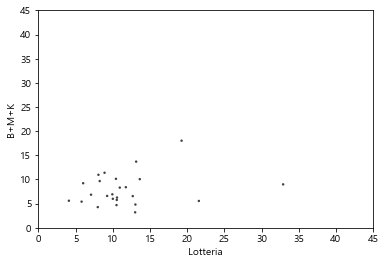

In [71]:
plt.scatter(df_BMKL['Sum_BMK'] + np.random.random(len(df_BMKL)),
            df_BMKL['LOT'] + np.random.random(len(df_BMKL)),
            edgecolor='none', alpha=0.75, s=6, c='black')
plt.xlim(0, 45)
plt.ylim(0, 45)
plt.xlabel('Lotteria')
plt.ylabel('B+M+K')